In [3]:
import tensorflow as tf
import numpy as np
import pickle

In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_12_2.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:100000,:]
x_test = input_data[100000:,:]


(105000, 24)


In [5]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_12_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:100000,:]
y_test = output_data[100000:,:]
print(output_data.shape)

(105000, 12)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2,validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 1s - loss: 0.4019 - accuracy: 0.8394 - val_loss: 0.3206 - val_accuracy: 0.8668
Epoch 2/100
100000/100000 - 1s - loss: 0.2756 - accuracy: 0.8845 - val_loss: 0.2471 - val_accuracy: 0.8967
Epoch 3/100
100000/100000 - 1s - loss: 0.2270 - accuracy: 0.9030 - val_loss: 0.2153 - val_accuracy: 0.9073
Epoch 4/100
100000/100000 - 1s - loss: 0.2040 - accuracy: 0.9112 - val_loss: 0.1989 - val_accuracy: 0.9135
Epoch 5/100
100000/100000 - 1s - loss: 0.1921 - accuracy: 0.9152 - val_loss: 0.1907 - val_accuracy: 0.9154
Epoch 6/100
100000/100000 - 1s - loss: 0.1863 - accuracy: 0.9168 - val_loss: 0.1881 - val_accuracy: 0.9161
Epoch 7/100
100000/100000 - 1s - loss: 0.1816 - accuracy: 0.9187 - val_loss: 0.1823 - val_accuracy: 0.9174
Epoch 8/100
100000/100000 - 1s - loss: 0.1773 - accuracy: 0.9202 - val_loss: 0.1778 - val_accuracy: 0.9195
Epoch 9/100
100000/100000 - 1s - loss: 0.1728 - accuracy: 0.9222 - val_loss: 0.1741 - val_accu

Epoch 77/100
100000/100000 - 1s - loss: 0.0633 - accuracy: 0.9728 - val_loss: 0.0716 - val_accuracy: 0.9681
Epoch 78/100
100000/100000 - 1s - loss: 0.0625 - accuracy: 0.9733 - val_loss: 0.0696 - val_accuracy: 0.9694
Epoch 79/100
100000/100000 - 1s - loss: 0.0623 - accuracy: 0.9735 - val_loss: 0.0723 - val_accuracy: 0.9686
Epoch 80/100
100000/100000 - 1s - loss: 0.0621 - accuracy: 0.9735 - val_loss: 0.0690 - val_accuracy: 0.9708
Epoch 81/100
100000/100000 - 1s - loss: 0.0611 - accuracy: 0.9739 - val_loss: 0.0682 - val_accuracy: 0.9709
Epoch 82/100
100000/100000 - 1s - loss: 0.0610 - accuracy: 0.9740 - val_loss: 0.0677 - val_accuracy: 0.9707
Epoch 83/100
100000/100000 - 1s - loss: 0.0604 - accuracy: 0.9741 - val_loss: 0.0669 - val_accuracy: 0.9712
Epoch 84/100
100000/100000 - 1s - loss: 0.0606 - accuracy: 0.9740 - val_loss: 0.0694 - val_accuracy: 0.9708
Epoch 85/100
100000/100000 - 1s - loss: 0.0610 - accuracy: 0.9740 - val_loss: 0.0700 - val_accuracy: 0.9705
Epoch 86/100
100000/100000 -

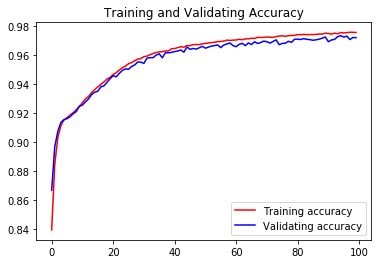

In [8]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [9]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_12_2_model.h5')